# State Machines in Python - Part 4

Have a look at the state machine below. It includes a transition with a decision inside. Depending on a coin toss, the transition either ends in state `heads` or `tails`. How should we implement such a transition? 

- The transitions we have seen so far all had a static target state, determined by the dict that defined it.
- The choice may depend on all sorts of functions or variables. In the diagram we just write 'toss a coin', but in the Python code we want to code that as a convenient if-statement.

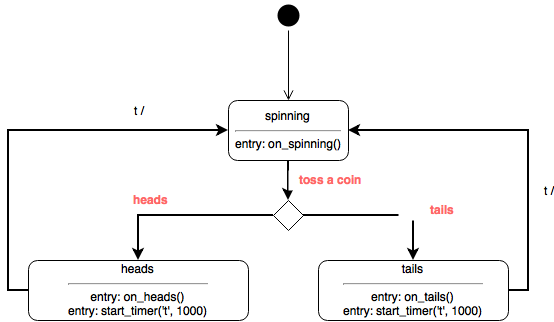

We create the code for the state machine below. See the dict `t1` that is a **compound transition**. Instead of declaring a target state in the dict, it refers to a function. When you look at the function, you see that it implements the decision and returns a string that declares the next state. 

In [10]:
from stmpy import Machine, Driver

import ipywidgets as widgets
from IPython.display import display

import random

class CoinFlip:
    
    def on_button_flip(self, b):
        self.stm.send_signal('flip') # <---- here we send a signal
            
    def __init__(self):
        # display the user interface
        # a button
        self.button_flip = widgets.Button(description="Flip")
        self.button_flip.on_click(self.on_button_flip)
        
        # text field
        self.text = widgets.Text(value='', placeholder='', description='String:', disabled=False)
        display(self.text, self.button_flip)
    
    def on_spinning(self):
        self.text.set_trait(name='value', value='spinning...')

    def on_heads(self):
        self.text.set_trait(name='value', value='Heads!')
        
    def on_tails(self):
        self.text.set_trait(name='value', value='Tails!')
            
    def start_timer(self):
        # start the timer
        self.stm.start_timer('t', 1000)
    
    # Code for the compound transition:
    def flip_compound_transition(self):
        coin = random.randint(1,2)
        if coin==1:
            return 'heads'
        else:
            return 'tails'

        
coin_flip = CoinFlip()
        
# initial transition
t0 = {'source': 'initial',
      'target': 'spinning'}

# compound transition
t1 = {'trigger':'flip',
      'source':'spinning',
      'function': coin_flip.flip_compound_transition}

# the other two regular transitions:
t2 = {'trigger':'t', 
      'source':'heads', 
      'target':'spinning'}
t3 = {'trigger':'t', 
      'source':'tails', 
      'target':'spinning'}

# the states:
spinning = {'name': 'spinning',
            'entry': 'on_spinning'}

heads = {'name': 'heads',
        'entry': 'on_heads;start_timer'}

tails = {'name': 'tails',
        'entry': 'on_tails;start_timer'}


# Change 4: We pass the set of states to the state machine
machine = Machine(name='coin_flip', transitions=[t0, t1, t2, t3], obj=coin_flip, states=[spinning, heads, tails])
coin_flip.stm = machine

driver = Driver()
driver.add_machine(machine)
driver.start()

Text(value='', description='String:', placeholder='')

Button(description='Flip', style=ButtonStyle())

## Run the Machine

Of course, run the cell above and study the behavior. 